**Milestone 2 Week 6**

**Problem Statment and Background**:
 Currently image classification is done on a CNN which is a very computationally intensive method which means that any device that uses image classification is quite expensive. A very well known example of this would be in healthcare, MRI,Catscans, and Xray’s all use image classification and these pieces of machinery are very expensive. However KNN is another algorithm used for classification and it is computationally efficient compared to a CNN. By seeing if a KNN algorithm can be used for image classification we can reduce the cost of these machines. Therefore, is it possible that we can use a KNN algorithm to accurately classify images on the CIFAR10 dataset with up to 90% accuracy using the independent variables image pixel values, distance metric, and number of neighbors?

 **Datasets used**
 I will be using the CIFAR 10 datasetThis dataset consists of 60000 images of dimensions 32x32 divided into 10 classes.


* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

When intially loading the dataset its split into two big parts, the first part contains the RGB values for the image and it has a numerical label. The other half of the data contains the string value. I have multiple copies of the data. I then compute the grayscale version of the data and have that stored. Both of the datasets are stored in a numpy array as well as Pandas dataset. I then create a seperate copy with the RGB and Grayscale values with the string names in the label collumn rather than the using the intergers. There are no duplicates, and no errors in the dataset that need fixing. One thing important I do is I standardize both the RGB and Grayscale values so its between 0-1. The graytorgb function does the standardizing calculation for the grayscale values. To standardize the RGB values I just divide all the values by 255 since thats the max value and RGB pixel can be






In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier


In this section we will load the data set and preprocess the data by converting to RGB and Grayscale as well as normalizing the pixel values.

In [2]:
#Importing CIFAR 10 Dataset
#Default is RGB values 32x32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

#Normalize the RGB values
x_train = x_train/ 255.0
x_test = x_test / 255.0





print("Size of test RGB Normalized" + repr(x_train_gray.shape)) #5K images each sized 32x32 with 3 numbers to represent Red Green Blue
print(x_test[0])


print("Size of train Gray "  + repr(x_train_gray.shape))
print(x_test_gray[0])

Size of test RGB Normalized(50000, 32, 32)
[[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

 [[0.23921569 0.45490196 0.6588

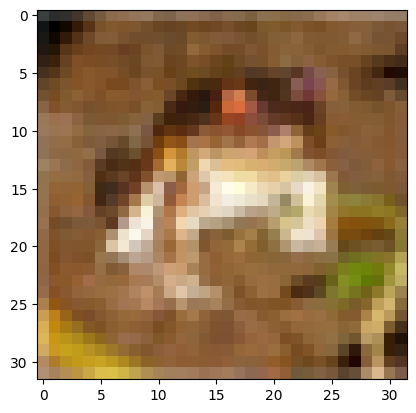

[6]


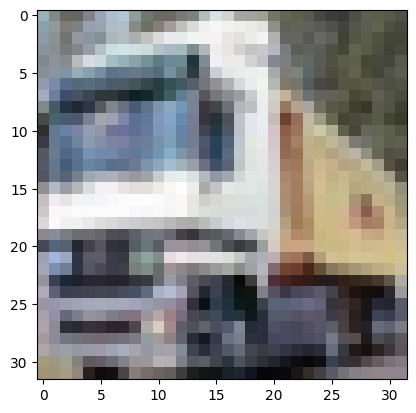

[9]


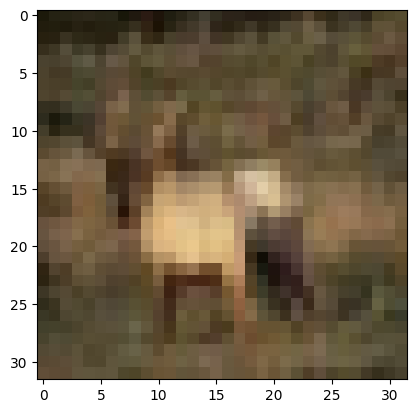

[4]


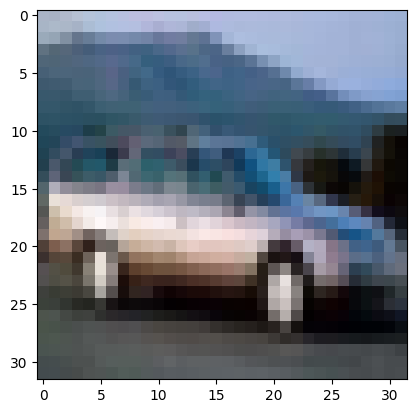

[1]


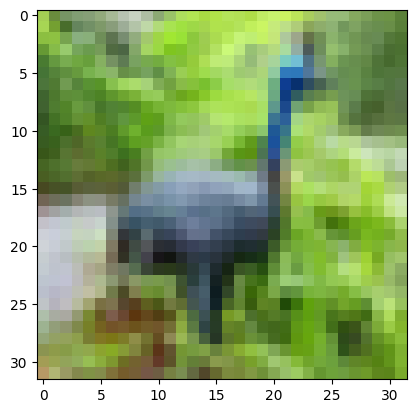

[2]


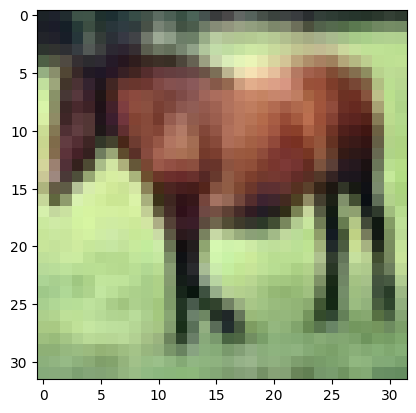

[7]


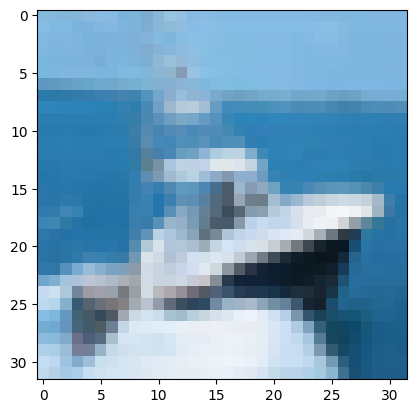

[8]


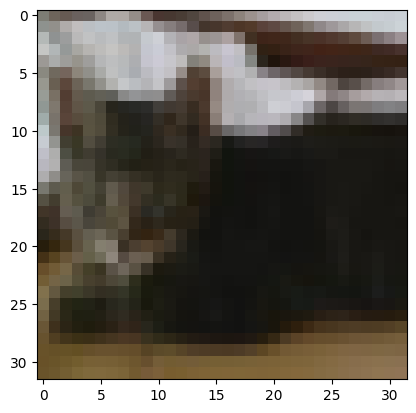

[3]


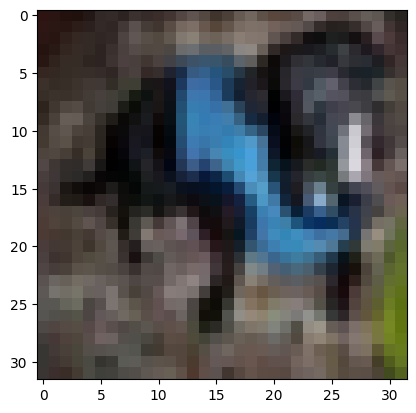

[5]


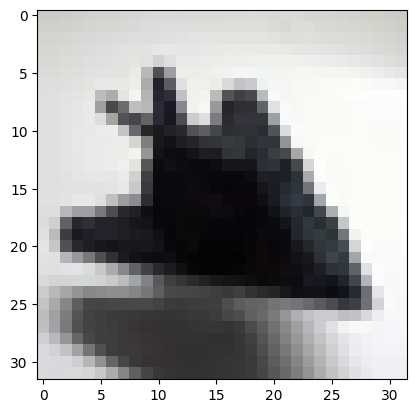

[0]


In [3]:
#Examining what the data looks like RGB
y_train_l=[]
for i in range(len(y_train)):
  if y_train[i] not in y_train_l:
      plt.imshow(x_train[i])
      plt.show()
      print(y_train[i])
      y_train_l.append(y_train[i])

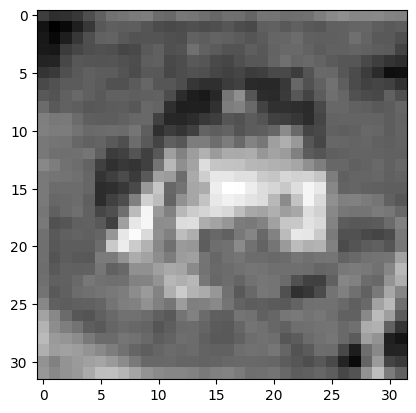

[6]


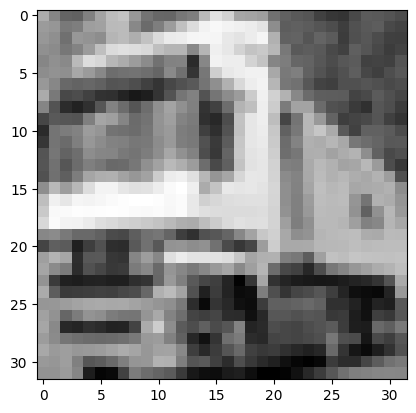

[9]


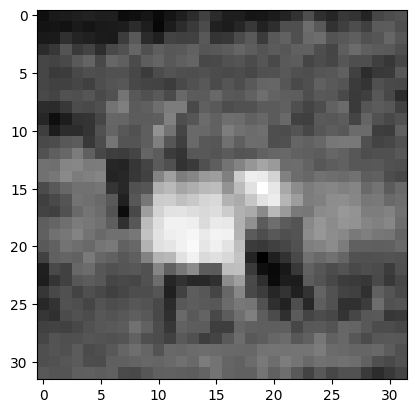

[4]


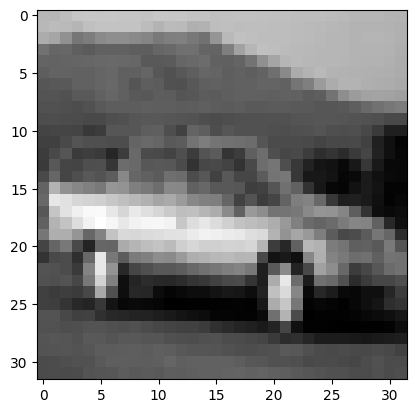

[1]


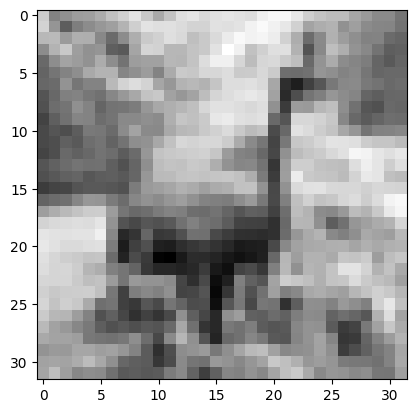

[2]


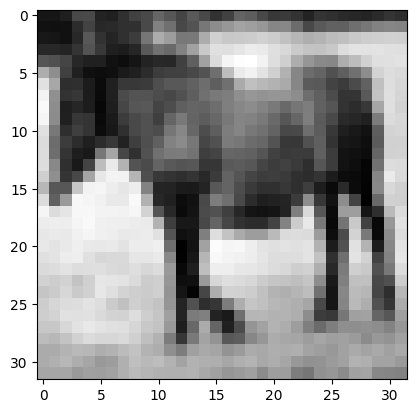

[7]


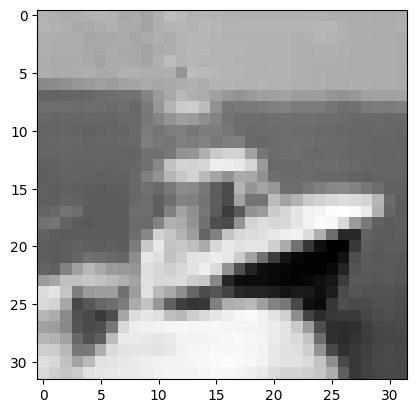

[8]


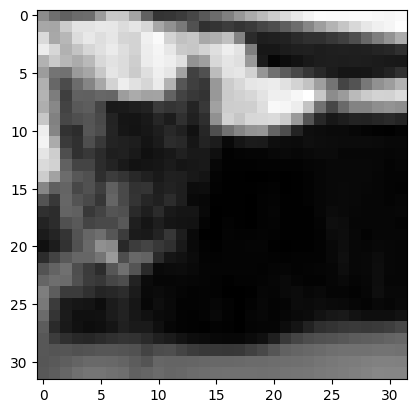

[3]


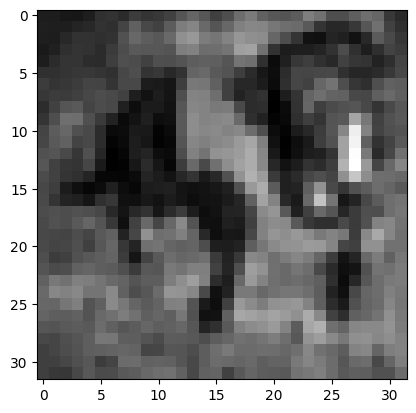

[5]


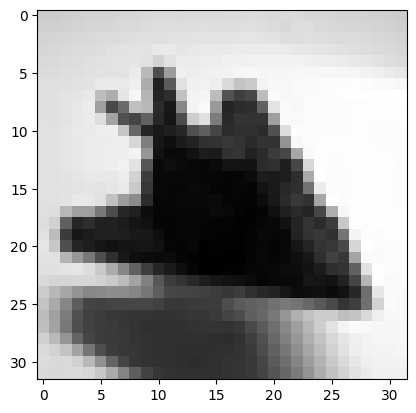

[0]


In [4]:
#Examining what the data looks like Grayscaled

y_train_l=[]
for i in range(len(y_train)):
  if y_train[i] not in y_train_l:
      plt.imshow(x_train_gray[i],cmap='gray')
      plt.show()
      print(y_train[i])
      y_train_l.append(y_train[i])

Create a copy of the data and create a pandas DF, we then will add the labels to the data so its not just an interger, and we will look at how the data is strucctured at a very high level ie(Loook at how the data is formated)

In [5]:
#Convert to Pandas  DF using the head method to see how the data is arranged
#We need to flatten the data so that we can make it into a pandas dataframe
x_train_flattened_df = x_train.reshape(x_train.shape[0], -1)
x_test_flattened_df = x_test.reshape(x_test.shape[0], -1)

#Create PD DF for train
df_train = pd.DataFrame(x_train_flattened_df)

#Create the labels collumn for train
df_train['label'] = y_train

#Create PD DF for test
df_test = pd.DataFrame(x_test_flattened_df)

#Create the labels collumn for test
df_test['label'] = y_test

print("DF train head")
print(df_train.head())
print(df_train.shape)

DF train head
          0         1         2         3         4         5         6  \
0  0.231373  0.243137  0.247059  0.168627  0.180392  0.176471  0.196078   
1  0.603922  0.694118  0.733333  0.494118  0.537255  0.533333  0.411765   
2  1.000000  1.000000  1.000000  0.992157  0.992157  0.992157  0.992157   
3  0.109804  0.098039  0.039216  0.145098  0.133333  0.074510  0.149020   
4  0.666667  0.705882  0.776471  0.658824  0.698039  0.768627  0.694118   

          7         8         9  ...      3063      3064      3065      3066  \
0  0.188235  0.168627  0.266667  ...  0.847059  0.721569  0.549020  0.592157   
1  0.407843  0.372549  0.400000  ...  0.560784  0.521569  0.545098  0.560784   
2  0.992157  0.992157  0.992157  ...  0.305882  0.333333  0.325490  0.309804   
3  0.137255  0.078431  0.164706  ...  0.211765  0.184314  0.109804  0.247059   
4  0.725490  0.796078  0.717647  ...  0.294118  0.309804  0.321569  0.278431   

       3067      3068      3069      3070      3071  l

In [6]:
x_train_flattened_dfg = x_train.reshape(x_train_gray.shape[0], -1)
x_test_flattened_dfg = x_test.reshape(x_test_gray.shape[0], -1)

#Create PD DF for train
df_train_gray= pd.DataFrame(x_train_flattened_dfg)

#Create the labels collumn for train
df_train_gray['label'] = y_train

#Create PD DF for test
df_test_gray = pd.DataFrame(x_test_flattened_dfg)

#Create the labels collumn for test
df_test_gray['label'] = y_test

print("DF train head")
print(df_train_gray.head())
print(df_train_gray.shape)

DF train head
          0         1         2         3         4         5         6  \
0  0.231373  0.243137  0.247059  0.168627  0.180392  0.176471  0.196078   
1  0.603922  0.694118  0.733333  0.494118  0.537255  0.533333  0.411765   
2  1.000000  1.000000  1.000000  0.992157  0.992157  0.992157  0.992157   
3  0.109804  0.098039  0.039216  0.145098  0.133333  0.074510  0.149020   
4  0.666667  0.705882  0.776471  0.658824  0.698039  0.768627  0.694118   

          7         8         9  ...      3063      3064      3065      3066  \
0  0.188235  0.168627  0.266667  ...  0.847059  0.721569  0.549020  0.592157   
1  0.407843  0.372549  0.400000  ...  0.560784  0.521569  0.545098  0.560784   
2  0.992157  0.992157  0.992157  ...  0.305882  0.333333  0.325490  0.309804   
3  0.137255  0.078431  0.164706  ...  0.211765  0.184314  0.109804  0.247059   
4  0.725490  0.796078  0.717647  ...  0.294118  0.309804  0.321569  0.278431   

       3067      3068      3069      3070      3071  l

In [7]:
#Use the head method to examine the test data
print("DF test head")
print(df_test.head())
print(df_test.shape)

DF test head
          0         1         2         3         4         5         6  \
0  0.619608  0.439216  0.192157  0.623529  0.435294  0.184314  0.647059   
1  0.921569  0.921569  0.921569  0.905882  0.905882  0.905882  0.909804   
2  0.619608  0.745098  0.870588  0.619608  0.733333  0.854902  0.545098   
3  0.607843  0.611765  0.584314  0.654902  0.690196  0.733333  0.690196   
4  0.254902  0.266667  0.196078  0.274510  0.317647  0.250980  0.188235   

          7         8         9  ...      3063      3064      3065      3066  \
0  0.454902  0.200000  0.650980  ...  0.094118  0.301961  0.486275  0.133333   
1  0.909804  0.909804  0.909804  ...  0.658824  0.717647  0.698039  0.705882   
2  0.650980  0.760784  0.517647  ...  0.019608  0.023529  0.031373  0.015686   
3  0.701961  0.756863  0.745098  ...  0.235294  0.247059  0.196078  0.250980   
4  0.250980  0.180392  0.117647  ...  0.560784  0.701961  0.533333  0.603922   

       3067      3068      3069      3070      3071  la

In [8]:
#Gathering more infromation about the test and train data using the info method
print(df_test.info())
print("    Space         ")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3073 entries, 0 to label
dtypes: float64(3072), uint8(1)
memory usage: 234.4 MB
None
    Space         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3073 entries, 0 to label
dtypes: float64(3072), uint8(1)
memory usage: 1.1 GB
None


Currently the labels collumn is full of intergers however,
using the PANDAS df we created for the test and train we will create a copy of the dataset that has the acutal string values

In [9]:


copy1_df_train = df_train.copy()
copy2_df_test = df_test.copy()

copy1_df_train['label'] = copy1_df_train['label'].map(label_names)
copy2_df_test['label'] = copy2_df_test['label'].map(label_names)

print(copy1_df_train.head())
print(copy2_df_test.head())


          0         1         2         3         4         5         6  \
0  0.231373  0.243137  0.247059  0.168627  0.180392  0.176471  0.196078   
1  0.603922  0.694118  0.733333  0.494118  0.537255  0.533333  0.411765   
2  1.000000  1.000000  1.000000  0.992157  0.992157  0.992157  0.992157   
3  0.109804  0.098039  0.039216  0.145098  0.133333  0.074510  0.149020   
4  0.666667  0.705882  0.776471  0.658824  0.698039  0.768627  0.694118   

          7         8         9  ...      3063      3064      3065      3066  \
0  0.188235  0.168627  0.266667  ...  0.847059  0.721569  0.549020  0.592157   
1  0.407843  0.372549  0.400000  ...  0.560784  0.521569  0.545098  0.560784   
2  0.992157  0.992157  0.992157  ...  0.305882  0.333333  0.325490  0.309804   
3  0.137255  0.078431  0.164706  ...  0.211765  0.184314  0.109804  0.247059   
4  0.725490  0.796078  0.717647  ...  0.294118  0.309804  0.321569  0.278431   

       3067      3068      3069      3070      3071       label  
0 

Here in this section we will go much more in depth of the data, we will see how the pixels are arranged for each label, look at duplicates (if any), we will look into the SNR for each label as well as dynamic range. We will also plot and see if

In [10]:


#Figuring out how many photos belong to each class
print("Train data")
print(copy1_df_train['label'].value_counts())
print("Test data")
print(copy2_df_test['label'].value_counts())



Train data
label
Frog          5000
Truck         5000
Deer          5000
Automobile    5000
Bird          5000
Horse         5000
Ship          5000
Cat           5000
Dog           5000
Airplane      5000
Name: count, dtype: int64
Test data
label
Cat           1000
Ship          1000
Airplane      1000
Frog          1000
Automobile    1000
Truck         1000
Dog           1000
Horse         1000
Deer          1000
Bird          1000
Name: count, dtype: int64


As we can see there is an equal amount of photos for each class. Let us look at dynamic range and SNR vs Label names as well as RGB and Grayscale vs Label Names. For dynamic range and SNR vs label names we will look at a scatter plot and histogram. We will also look at Grayscale and RGB vs Label names at a bar plot

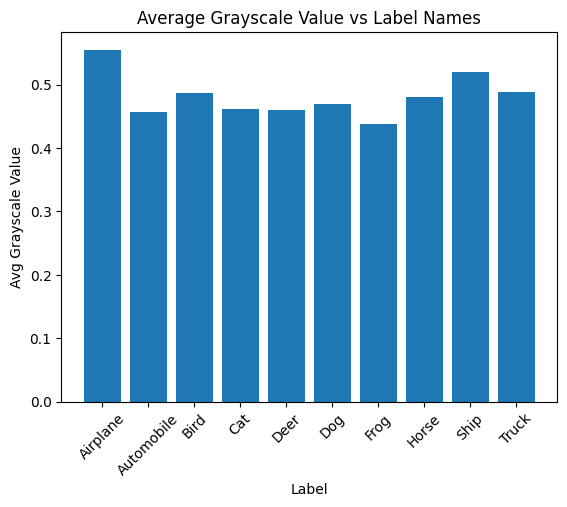

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Airplane'),
  Text(1, 0, 'Automobile'),
  Text(2, 0, 'Bird'),
  Text(3, 0, 'Cat'),
  Text(4, 0, 'Deer'),
  Text(5, 0, 'Dog'),
  Text(6, 0, 'Frog'),
  Text(7, 0, 'Horse'),
  Text(8, 0, 'Ship'),
  Text(9, 0, 'Truck')])

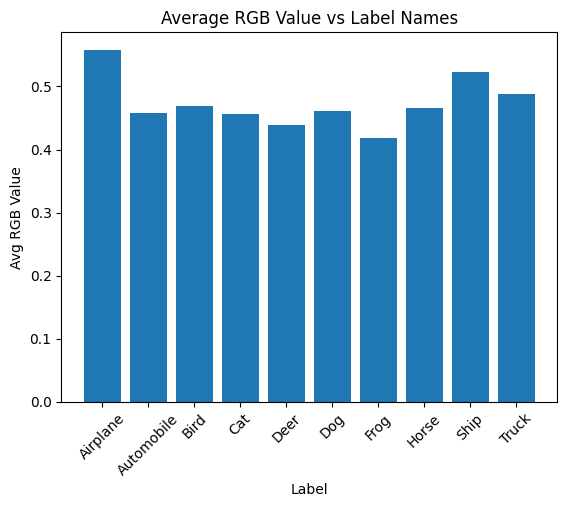

In [11]:
#Lets first look at RGB and Grayscale vs Label Names for the
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
grayA=[]
for i in range(10):
 inter=(x_train_gray[y_train.flatten()==i])
 avg=np.mean(inter) #We take the mean because it will run an error saying different size arrays and wont plot, so we will take the average of all the grayscale pixels
 grayA.append(avg)

plt.bar(labels, grayA)
plt.xlabel('Label')
plt.ylabel('Avg Grayscale Value')
plt.title('Average Grayscale Value vs Label Names')
plt.xticks(rotation=45)
plt.show()

rgb = []
for i in range(10):
  inter=(x_train[y_train.flatten()==i])
  avg=np.mean(inter)
  rgb.append(avg)

plt.bar(labels, rgb)
plt.xlabel('Label')
plt.ylabel('Avg RGB Value')
plt.title('Average RGB Value vs Label Names')
plt.xticks(rotation=45)



As we can see from the graph above using the average RGB and Grasycale value we can see for each label the average RGB value and Grayscale value for each label.

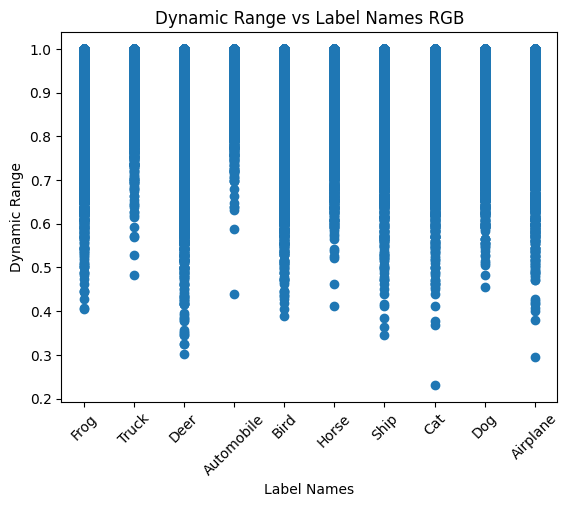

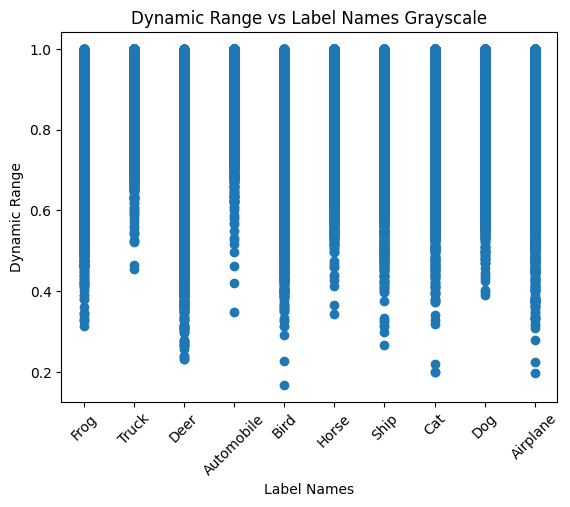

In [12]:
dynamic_range=[]
for i in range(len(x_train)):
  inter = np.max(x_train[i]) - np.min(x_train[i]) #Calculate Dynamic Range
  dynamic_range.append(inter)

df_temp=df_train.copy()
df_temp['dynamic_range']=dynamic_range
plt.scatter(copy1_df_train['label'], df_temp['dynamic_range'])
plt.xlabel('Label Names')
plt.ylabel('Dynamic Range')
plt.title('Dynamic Range vs Label Names RGB')
plt.xticks(rotation=45)
plt.show()

dynamic_range_g=[]
for i in range(len(x_train_gray)):
  inter = np.max(x_train_gray[i]) - np.min(x_train_gray[i]) #Calculate Dynamic Range
  dynamic_range_g.append(inter)

df_temp=df_train.copy()
df_temp['dynamic_range_g']=dynamic_range_g
plt.scatter(copy1_df_train['label'], df_temp['dynamic_range_g'])
plt.xlabel('Label Names')
plt.ylabel('Dynamic Range')
plt.title('Dynamic Range vs Label Names Grayscale')
plt.xticks(rotation=45)
plt.show()

As we can see the images of the Deer, Frog, Bird, Ship, Cat, and Airplane all have a high dynamic range. However the Truck, Automoible, Horse, Cat, and Airplane have some outliers.

As we can see there is not really a pattern that can be recognized from this lets see if the SNR vs class label can provide us a better understanding.



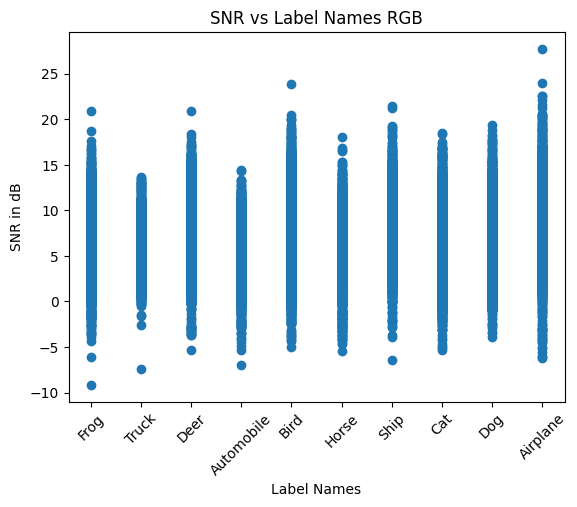

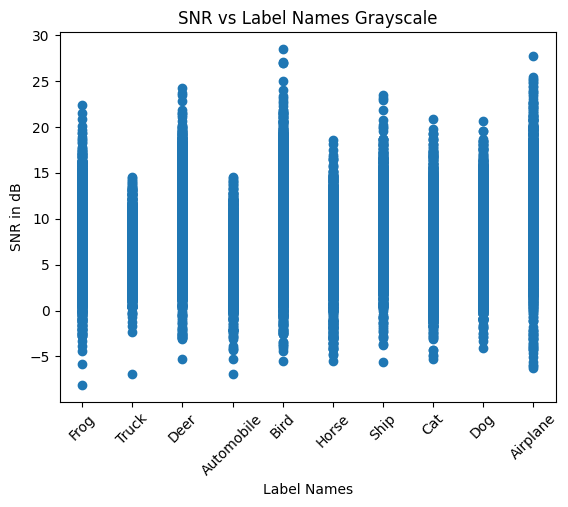

In [13]:
def SNR(x):
  i=np.mean(x)
  j=np.std(x)
  return 20*np.log10(i/j) #return snr in dB


snr=[]
for i in range(len(x_train)):
  inter=SNR(x_train[i])
  snr.append(inter)

df_temp2=df_train.copy()
df_temp2['snr']= snr
plt.scatter(copy1_df_train['label'], df_temp2['snr'])
plt.xlabel('Label Names')
plt.ylabel('SNR in dB')
plt.title('SNR vs Label Names RGB')
plt.xticks(rotation=45)
plt.show()

snr_g=[]
for i in range(len(x_train_gray)):
  inter=SNR(x_train_gray[i])
  snr_g.append(inter)

df_temp2=df_train.copy()
df_temp2['snr_g']= snr_g
plt.scatter(copy1_df_train['label'], df_temp2['snr_g'])
plt.xlabel('Label Names')
plt.ylabel('SNR in dB')
plt.title('SNR vs Label Names Grayscale')
plt.xticks(rotation=45)
plt.show()

In [14]:
#combining the metrics into a new pandas df

df_rgb = pd.DataFrame({
    'Dynamic Range': dynamic_range,
    'SNR': snr,
    'Label': copy1_df_train['label']
})

df_g = pd.DataFrame({
    'Dynamic Range': dynamic_range_g,
    'SNR': snr_g,
    'Label': copy1_df_train['label']
})

print(df_rgb.head())
print(df_g.head())

   Dynamic Range       SNR       Label
0       1.000000  5.978705        Frog
1       0.976471  6.669922       Truck
2       0.921569  4.189528       Truck
3       0.901961  6.846945        Deer
4       0.996078  4.654477  Automobile
   Dynamic Range       SNR       Label
0       0.987886  8.484445        Frog
1       0.968880  6.728570       Truck
2       0.914284  4.251302       Truck
3       0.763380  8.358545        Deer
4       0.975302  5.041621  Automobile


As we can see the images of the Deer, Frog, Bird, Ship, Cat, and Airplane all have a SNR range and the Truck, Automoible, Horse, Cat, and Airplane have some outliers which is similar to dynamic range. However together there seems to be no noticable patterns. Let us try a clustering algorthim (k-means) to see if we can find some sort of pattern. We will run the k-mean on both grayscale and RGB as well as for both dynamic range and SNR

0: 'Airplane'
 1: 'Automobile'
 2: 'Bird'
 3: 'Cat'
 4: 'Deer'
5:'Dog'
 6:'Frog' 
 7: 'Horse' 8:
'Ship'
 9: 'Truck'


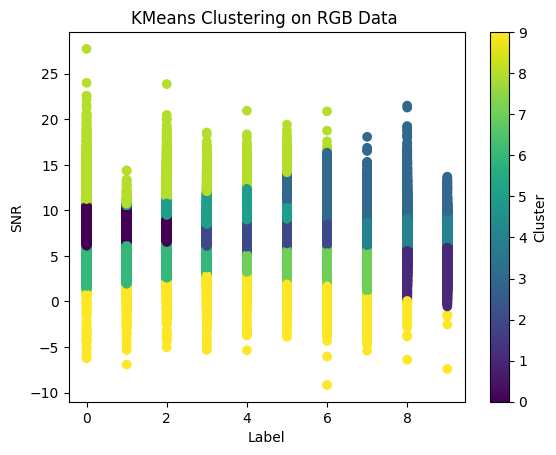

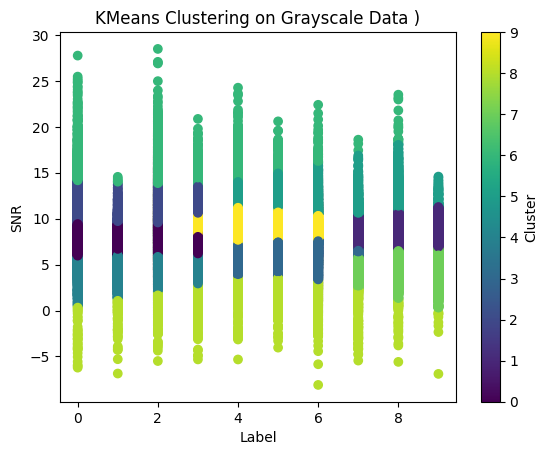

In [15]:
df_rgb = pd.DataFrame({
    'Dynamic Range': dynamic_range,
    'SNR': snr,
    'Label': df_train['label']
})

df_g = pd.DataFrame({
    'Dynamic Range': dynamic_range_g,
    'SNR': snr_g,
    'Label': df_train['label']
})



# Formulate the data so we can input it into the k means clustering command
df_rgb_features = df_rgb[['SNR', 'Label']]
df_g_features = df_g[['SNR', 'Label']]

# Initialize KMeans with 10 clusters since we hace 10 classes
k_rgb = KMeans(n_clusters=10, random_state=0)
k_g = KMeans(n_clusters=10, random_state=0)

# Run KMeans clustering
df_rgb['Cluster'] = k_rgb.fit_predict(df_rgb_features)
df_g['Cluster'] = k_g.fit_predict(df_g_features)

# Create scatter plot
print("0: 'Airplane'\n 1: 'Automobile'\n 2: 'Bird'\n 3: 'Cat'\n 4: 'Deer'\n5:'Dog'\n 6:'Frog' \n 7: 'Horse' 8:\n'Ship'\n 9: 'Truck'")
plt.figure()
plt.scatter(df_rgb['Label'], df_rgb['SNR'], c=df_rgb['Cluster'])
plt.title('KMeans Clustering on RGB Data ')
plt.xlabel('Label')
plt.ylabel('SNR')
plt.colorbar(label='Cluster')
plt.show()

# Create scatter plot
plt.figure()
plt.scatter(df_g['Label'], df_g['SNR'], c=df_g['Cluster']) #i/ps as follows (x-axis,y-axis, color mapping)
plt.title('KMeans Clustering on Grayscale Data )')
plt.xlabel('Label')
plt.ylabel('SNR')
plt.colorbar(label='Cluster')
plt.show()

As we can see from the graphs above the Kmeans algorhtim  it is not able to accurately group the labels.

0: 'Airplane'
 1: 'Automobile'
 2: 'Bird'
 3: 'Cat'
 4: 'Deer'
5:'Dog'
 6:'Frog' 
 7: 'Horse' 8:
'Ship'
 9: 'Truck'


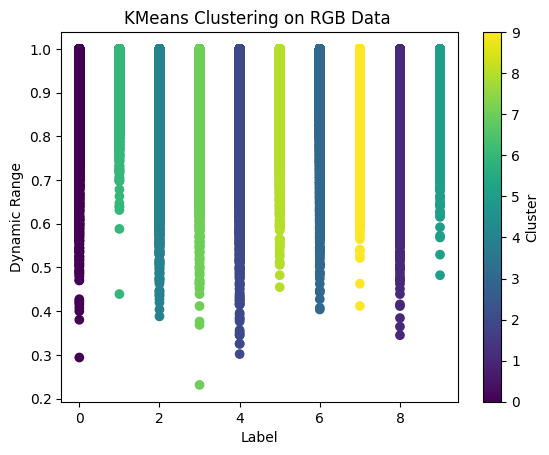

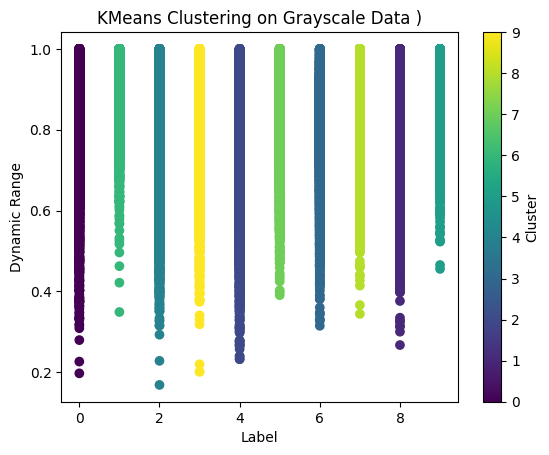

In [16]:
# Formulate the data so we can input it into the k means clustering command
df_rgb_features = df_rgb[['Dynamic Range', 'Label']]
df_g_features = df_g[['Dynamic Range', 'Label']]

# Initialize KMeans with 10 clusters since we hace 10 classes
k_rgb = KMeans(n_clusters=10, random_state=0)
k_g = KMeans(n_clusters=10, random_state=0)

# Run KMeans clustering
df_rgb['Cluster'] = k_rgb.fit_predict(df_rgb_features)
df_g['Cluster'] = k_g.fit_predict(df_g_features)

# Create scatter plot
print("0: 'Airplane'\n 1: 'Automobile'\n 2: 'Bird'\n 3: 'Cat'\n 4: 'Deer'\n5:'Dog'\n 6:'Frog' \n 7: 'Horse' 8:\n'Ship'\n 9: 'Truck'")
plt.figure()
plt.scatter(df_rgb['Label'], df_rgb['Dynamic Range'], c=df_rgb['Cluster'])
plt.title('KMeans Clustering on RGB Data ')
plt.xlabel('Label')
plt.ylabel('Dynamic Range')
plt.colorbar(label='Cluster')
plt.show()

# Create scatter plot
plt.figure()
plt.scatter(df_g['Label'], df_g['Dynamic Range'], c=df_g['Cluster']) #i/ps as follows (x-axis,y-axis, color mapping)
plt.title('KMeans Clustering on Grayscale Data )')
plt.xlabel('Label')
plt.ylabel('Dynamic Range')
plt.colorbar(label='Cluster')
plt.show()

As we can see we are not able to extreact out a pattern for Kmeans and it is not able to accurately cluster the groups to its apporpiate label compared to the graph above

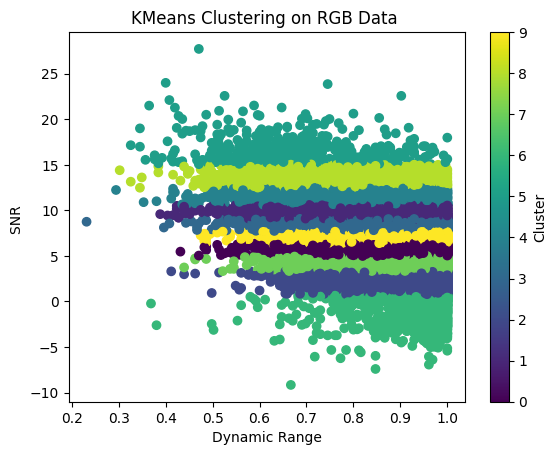

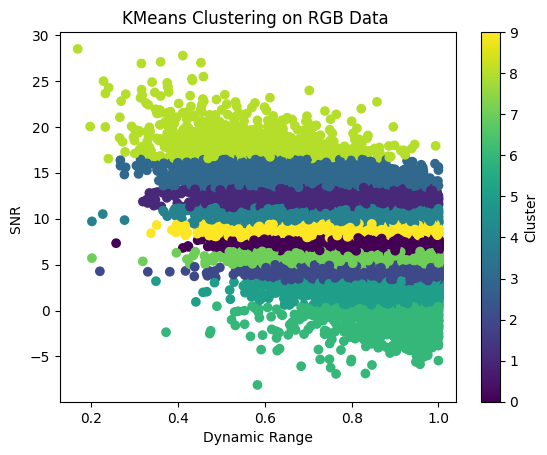

In [17]:
df_rgb_features = df_rgb[['Dynamic Range', 'SNR']]
df_g_features = df_g[['Dynamic Range', 'SNR']]

# Initialize KMeans with 10 clusters
k_rgb = KMeans(n_clusters=10, random_state=0)
k_g = KMeans(n_clusters=10, random_state=0)


df_rgb['Cluster'] = k_rgb.fit_predict(df_rgb_features)
df_g['Cluster'] = k_g.fit_predict(df_g_features)

# Create scatter plot

plt.figure()
plt.scatter(df_rgb['Dynamic Range'], df_rgb['SNR'], c=df_rgb['Cluster'])
plt.title('KMeans Clustering on RGB Data ')
plt.xlabel('Dynamic Range')
plt.ylabel('SNR ')
plt.colorbar(label='Cluster')
plt.show()



plt.figure()
plt.scatter(df_g['Dynamic Range'], df_g['SNR'], c=df_g['Cluster'])
plt.title('KMeans Clustering on RGB Data ')
plt.xlabel('Dynamic Range')
plt.ylabel('SNR ')
plt.colorbar(label='Cluster')
plt.show()


From the graphs above we can see using Kmeans clustering we can see a very uniform distribution of data.  We can also see that there is a high variability in range for SNR and Dynamic range.

So from the graphs produced the average RGB value and average Grayscale value for each label is about the same with the only expection being airplane which is around 0.7. There SNR vs Label feature also does really show any patterns and is important to not that the SNR range for both the RGB and grayscale values are very wide. This wide feature also hold true for the Dynamic range of the pixels for both the grayscale and the RGB values. However when plotting the Dynamic range vs SNR and using the Kmeans algorithim we can see a roughly uniform distribution of data with some outliers. I suspect because the data is advanced (ie using 3 values per pixel) trying to convert it to a pandas df bby flattening the array could be the issue or the data could be to advanced for any patterns to show when plotting or there is some other type of plot that could best find out patterns in the data. I also suspect the advanvced data is also what caused the Kmeans algorhtim to not work. The next steps would be to create the KNN and mesaure the accuracy on both the Grayscale and RGB values and compare the results. I suspect the data would be challenging to work with mainly the RGB data since its 3 values per pixel.

In this part of the project we will utelize three seperate machine learning algorthims KNN (which is the one we want to use) with different K values, Desicsion Tree, and a linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

# Lets first start with a Descscion tree
# Create a Decision Tree Classifier

#Importing CIFAR 10 Dataset
#Default is RGB values 32x32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

#Normalize the RGB values
x_train = x_train/ 255.0
x_test = x_test / 255.0

#Flattening the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Use only 5000 samples for faster training otherwise it takes ages
x_train_flat_sample = x_train_flat[:5000]
y_train_sample = y_train[:5000]

clf = DecisionTreeClassifier(max_depth=10) #Using max_depth of which is max depth of tree



#Lets start with just the normalized RGB values
clf.fit(x_train_flat_sample,y_train_sample)
pred = clf.predict(x_test_flat) #Predict values
errors = 0.0
for i in range(len(pred)):
    if pred[i] != y_test[i]:
        errors += 1.0
print("Nornmalized RGB data errors using descion tree = ",errors, "out of", len(pred), "predictions")



Nornmalized RGB data errors using descion tree =  7615.0 out of 10000 predictions


As we can see using the descion tree will lead an accuracy of around around 23.5% which is not what we want we want an accuracy of at least 90 so lets see if we can get that via the SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
# Lets first start with a Descscion tree
# Create a Decision Tree Classifier

#Importing CIFAR 10 Dataset
#Default is RGB values 32x32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

#Normalize the RGB values
x_train = x_train/ 255.0
x_test = x_test / 255.0

#Flattening the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Use only 5000 samples for faster training otherwise it takes ages
x_train_flat_sample = x_train_flat[:5000]
y_train_sample = y_train[:5000]


# Create linear SVM
clf_linear = svm.SVC(kernel='linear')

# Fit linear SVM
clf_linear.fit(x_train_flat_sample, y_train_sample.ravel())

# Predict class for testing data
pred = clf_linear.predict(x_test_flat)

# Calculate prediction error for testing data
errors = 0.0
for i in range(len(pred)):
    if pred[i] != y_test[i]:
        errors += 1.0
print("Normalized RGB Data errors using a linear SVM = ",errors, "out of", len(pred), "predictions")







170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Normalized RGB Data errors using =  6882.0 out of 10000 predictions


In [2]:
print("Normalized RGB Data errors using a linear SVM = ",errors, "out of", len(pred), "predictions")

Normalized RGB Data errors using a linear SVM =  6882.0 out of 10000 predictions


In [1]:
!nividia-smi

/bin/bash: line 1: nividia-smi: command not found


As we can see here the accuracy is 31.18% for the linear SVM lets try the KNN and see what we get

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

#Normalize the RGB values
x_train = x_train/ 255.0
x_test = x_test / 255.0

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

acc = []
k=[1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_flat, y_train_flat)
    y_pred = knn.predict(x_test_flat)
    accuracy = accuracy_score(y_test_flat, y_pred)
    acc.append(accuracy)
    print("K acc: " + repr(acc))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
K acc: [0.3539]
K acc: [0.3539, 0.3303]
K acc: [0.3539, 0.3303, 0.3398]
K acc: [0.3539, 0.3303, 0.3398, 0.3415]
K acc: [0.3539, 0.3303, 0.3398, 0.3415, 0.3386]
K acc: [0.3539, 0.3303, 0.3398, 0.3415, 0.3386, 0.3428]
K acc: [0.3539, 0.3303, 0.3398, 0.3415, 0.3386, 0.3428, 0.3405]
K acc: [0.3539, 0.3303, 0.3398, 0.3415, 0.3386, 0.3428, 0.3405, 0.3375]
K acc: [0.3539, 0.3303, 0.3398, 0.3415, 0.3386, 0.3428, 0.3405, 0.3375, 0.3239]
K acc: [0.3539, 0.3303, 0.3398, 0.3415, 0.3386, 0.3428, 0.3405, 0.3375, 0.3239, 0.3118]


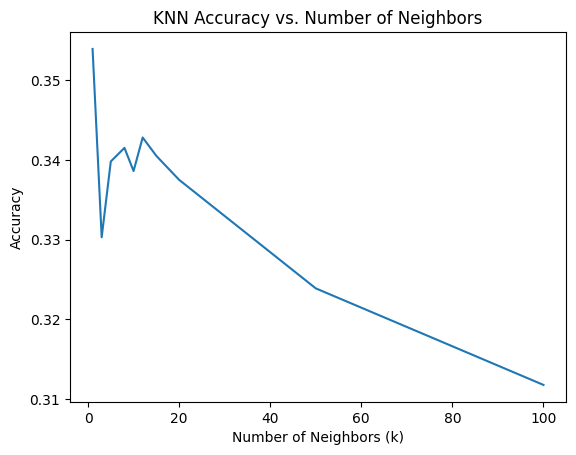

The optimal number of neighbors is: 1


In [8]:

plt.plot(k, acc)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.show()

ok = k[np.argmax(acc)]
print("The optimal number of neighbors is: " + repr(ok))

Now we repeat for grayscale values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

# Lets first start with a Descscion tree
# Create a Decision Tree Classifier

#Importing CIFAR 10 Dataset
#Default is RGB values 32x32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)




clf = DecisionTreeClassifier(max_depth=10) #Using max_depth of which is max depth of tree


x_train_gray_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_gray_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

x_train_gray_flat_sample = x_train_gray_flat[:5000]
y_train_sample = y_train[:5000]

clf.fit(x_train_gray_flat_sample,y_train_sample)
pred = clf.predict(x_test_gray_flat) #Predict values
errors = 0.0
for i in range(len(pred)):
    if pred[i] != y_test_flat[i]:
        errors += 1.0
print("Nornmalized grayscale data errors using descion tree = ",errors, "out of", len(pred), "predictions")



Nornmalized grayscale data errors using descion tree =  7883.0 out of 10000 predictions


As we can see the grayscale produces the a worse result than rgb with an acc of 22%

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
# Lets first start with a Descscion tree
# Create a Decision Tree Classifier

#Importing CIFAR 10 Dataset
#Default is RGB values 32x32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

#Normalize the RGB values
x_train = x_train/ 255.0
x_test = x_test / 255.0

#Flattening the images
x_train_gray_flat = x_train_gray.reshape(x_train.shape[0], -1)
x_test_gray_flat = x_test_gray.reshape(x_test.shape[0], -1)

# Use only 5000 samples for faster training otherwise it takes ages
x_train_flat_gray_sample = x_train_gray_flat[:5000]
y_train_sample = y_train[:5000]


# Create linear SVM
clf_linear = svm.SVC(kernel='linear')

# Fit linear SVM
clf_linear.fit(x_train_flat_gray_sample, y_train_sample.ravel())

# Predict class for testing data
pred = clf_linear.predict(x_test_gray_flat)

# Calculate prediction error for testing data
errors = 0.0
for i in range(len(pred)):
    if pred[i] != y_test[i]:
        errors += 1.0
print("Normalized grayscale Data errors using a linear SVM = ",errors, "out of", len(pred), "predictions")







Normalized RGB Data errors using a linear SVM =  7838.0 out of 10000 predictions


Here we can see the grayscale values producs a acc of 22% using a svm

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

'''Lables are found on this website https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
                  Create dictionary with label names
                   Mapping intergers to label names. label names found on tensorflow api'''

label_names = {0: 'Airplane',1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


#Next we will create a seperate copy of the data and use grayscaling, this function already normalized the values for us
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

#Normalize the RGB values
x_train = x_train/ 255.0
x_test = x_test / 255.0

x_train_flat = x_train_gray.reshape(x_train.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test.shape[0], -1)
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

acc = []
k=[1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_flat, y_train_flat)
    y_pred = knn.predict(x_test_flat)
    accuracy = accuracy_score(y_test_flat, y_pred)
    acc.append(accuracy)
    print("K acc: " + repr(acc))

K acc: [0.3034]
K acc: [0.3034, 0.2769]
K acc: [0.3034, 0.2769, 0.2963]
K acc: [0.3034, 0.2769, 0.2963, 0.2916]
K acc: [0.3034, 0.2769, 0.2963, 0.2916, 0.2911]
K acc: [0.3034, 0.2769, 0.2963, 0.2916, 0.2911, 0.2942]
K acc: [0.3034, 0.2769, 0.2963, 0.2916, 0.2911, 0.2942, 0.2925]
K acc: [0.3034, 0.2769, 0.2963, 0.2916, 0.2911, 0.2942, 0.2925, 0.2948]
K acc: [0.3034, 0.2769, 0.2963, 0.2916, 0.2911, 0.2942, 0.2925, 0.2948, 0.2811]
K acc: [0.3034, 0.2769, 0.2963, 0.2916, 0.2911, 0.2942, 0.2925, 0.2948, 0.2811, 0.2739]


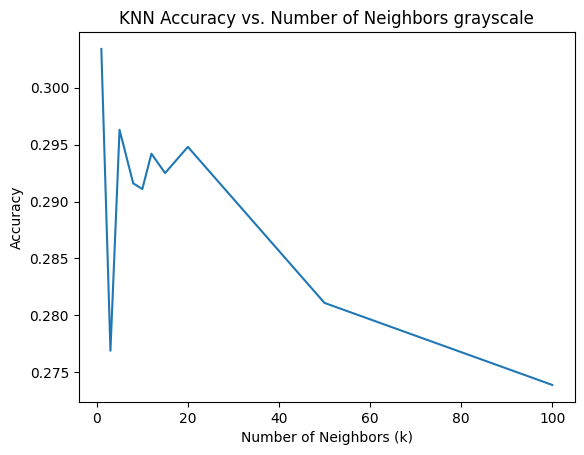

The optimal number of neighbors is: 1


In [7]:

plt.plot(k, acc)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors grayscale")
plt.show()

ok = k[np.argmax(acc)]
print("The optimal number of neighbors is: " + repr(ok))

As we can see the grayscale images preform worse than the rgb with the optimal K at 1 and an acc of 30.34%